In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler() # This instance will be used to scale (standardize) the features.

X_train_sc = sc_X.fit_transform(X_train)

# This line applies the standardization to the training data (X_train).
# It consists of two steps:
#               
#               Fit Step (fit): The fit method computes the mean and standard deviation needed for standardization based on the training data.
#                               In this case, it calculates the mean and standard deviation for each feature in X_train.
#               
#               Transform Step (transform): The transform method then applies the standardization to the training data,
#                                           transforming it into a standardized form.
#                                           The resulting standardized data is stored in the variable X_train_sc.

# Standardization is often recommended because k-nearest neighbors calculates distances between points,
# and if the scales of features are different, it can lead to biased predictions. By standardizing the features, 
# you ensure that each feature contributes equally to the distance calculation, improving the model's performance.

# This entire process ensures that each feature has a mean of 0 and a standard deviation of 1 after standardization,
# making them suitable for algorithms that are sensitive to the scale of input features, such as k-nearest neighbors.


In [161]:
# Access attributes

print("Scale:", sc_X.scale_) # After calling fit, this attribute contains the calculated standard deviations.
print("Mean:", sc_X.mean_) # After calling fit, this attribute contains the calculated means.
print("Variance:", sc_X.var_) # After calling fit, this attribute contains the calculated variances.
print("Number of samples seen:", sc_X.n_samples_seen_) # After calling fit, this attribute contains the number of samples.

Scale: [0.82036535 0.44724776 1.74502786 0.74914766]
Mean: [5.80916667 3.06166667 3.72666667 1.18333333]
Variance: [0.67299931 0.20003056 3.04512222 0.56122222]
Number of samples seen: 120


In [162]:
print('media luego de la estandarizacion ', round(np.mean(X_train_sc),3))

print('desvio estandar luego de la estandarizacion ', round(np.std(X_train_sc),3))


media luego de la estandarizacion  -0.0
desvio estandar luego de la estandarizacion  1.0


In [163]:
# It's crucial to maintain consistency between the training and testing datasets.
# The model should be exposed to the same transformation on both sets to ensure that the learned patterns generalize well to unseen data.

# After the scaler is fitted to the training data, it is used to transform the testing data (X_test).
# This ensures that the same mean and standard deviation learned from the training set are applied to the testing set.

X_test_sc = sc_X.transform(X_test)

In [164]:
model_KNN = KNeighborsClassifier(n_neighbors=40)

In [165]:
model_KNN.fit(X_train_sc, y_train) # trains the KNN classifier using the standardized training data (X_train_sc) and the corresponding labels (y_train).

KNeighborsClassifier(n_neighbors=40)

In [166]:
y_train_predict = model_KNN.predict(X_train_sc) # Predictions over training set
y_test_predict = model_KNN.predict(X_test_sc) # Predictions over test set

In [167]:
# Confussion Matrix

# The output of a classification model is often a continuous score or probability between 0 and 1.
# A classification threshold is then applied to this score to convert it into binary predictions (0 or 1).
# The choice of the threshold determines how the continuous scores are mapped to binary predictions.
# Impact on Confusion Matrix:
#           Changing the threshold affects the trade-off between false positives and false negatives, influencing the contents of the confusion matrix.
#           A lower threshold may result in more instances being classified as positive, potentially increasing false positives but decreasing false negatives.
#           A higher threshold may lead to the opposite effect, potentially increasing false negatives but decreasing false positives.
# Threshold Sensitivity:
# The sensitivity of the confusion matrix to the threshold is particularly relevant when evaluating models that provide probability scores,
# such as logistic regression or models with decision functions.


from sklearn.metrics import confusion_matrix

# Calculate confusion matrix over train set
cm_train = confusion_matrix(y_train, y_train_predict)

print("Confusion Matrix over train:")
print(cm_train)

Confusion Matrix over train:
[[40  0  0]
 [ 0 38  3]
 [ 0 13 26]]


In [168]:
# Calculate confusion matrix over test set
cm_test = confusion_matrix(y_test, y_test_predict)

print("Confusion Matrix over test:")
print(cm_test)

Confusion Matrix over test:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [169]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

cm_display_train = ConfusionMatrixDisplay(cm_train)
cm_display_test = ConfusionMatrixDisplay(cm_test)

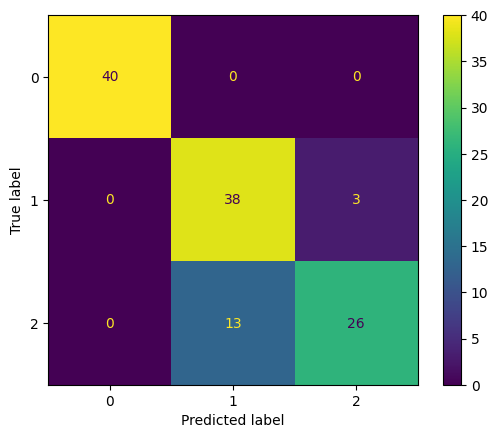

In [170]:
cm_display_train.plot()

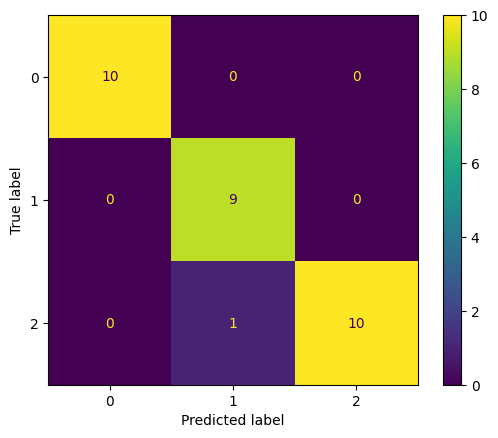

In [171]:
cm_display_test.plot()

In [172]:
accuracy_test = accuracy_score(y_test, y_test_predict) # the accuracy_score function returns the fraction of correctly classified samples
print("Accuracy:", accuracy_test)

Accuracy: 0.9666666666666667


In [173]:
accuracy_test = accuracy_score(y_test, y_test_predict, normalize=False) # normalize=False, it returns the count of correctly classified samples.
print("Accuracy:", accuracy_test)

Accuracy: 29


In [174]:
precision_test = precision_score(y_test, y_test_predict, average=None) # A precission for each class, not the average.
print("Pecission:", precision_test)

Pecission: [1.  0.9 1. ]


In [175]:
recall_test = recall_score(y_test, y_test_predict, average=None)
print("Recall:", recall_test)


Recall: [1.         1.         0.90909091]


In [176]:
f1_score_test = f1_score(y_test, y_test_predict, average=None)
print("F1-Score:", f1_score_test)

F1-Score: [1.         0.94736842 0.95238095]


In [177]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [178]:
from sklearn.preprocessing import label_binarize

# Get unique classes dynamically
unique_classes = np.unique(y_test)

# Binarize the labels without explicitly declaring classes
y_test_bin = label_binarize(y_test, classes=unique_classes)

In [179]:
y_score_proba = model_KNN.predict_proba(X_test)
y_score_proba[:12]

array([[0.   , 0.3  , 0.7  ],
       [0.025, 0.35 , 0.625],
       [0.   , 0.275, 0.725],
       [0.   , 0.3  , 0.7  ],
       [0.   , 0.3  , 0.7  ],
       [0.   , 0.35 , 0.65 ],
       [0.   , 0.325, 0.675],
       [0.   , 0.275, 0.725],
       [0.   , 0.3  , 0.7  ],
       [0.   , 0.3  , 0.7  ],
       [0.   , 0.275, 0.725],
       [0.   , 0.375, 0.625]])

In [180]:
y_score_proba[0,:]

array([0. , 0.3, 0.7])

In [181]:
# Here we can see how class 2 is returned on 0.5 % default treshold accetance

y_score_evaluated = model_KNN.predict(X_test)
y_score_evaluated[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [182]:
from sklearn.metrics import roc_curve, auc

In [183]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

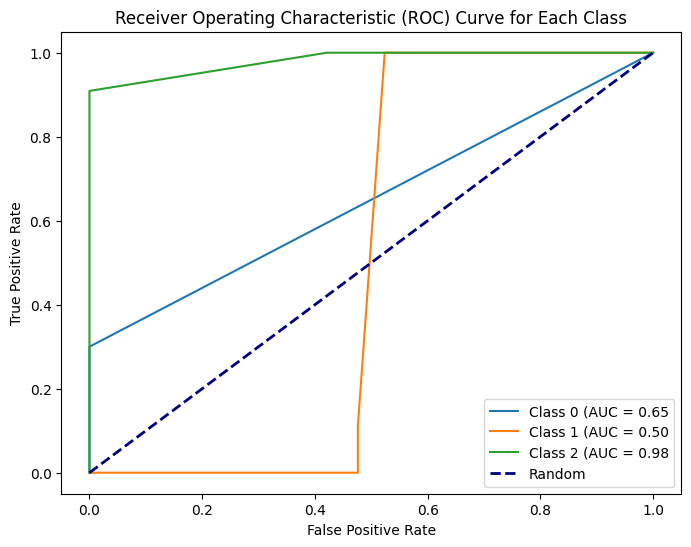

In [184]:
# These functions are useful for assessing the trade-off between true positive rate (sensitivity) and
# false positive rate across different threshold values.

# Compute ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(model_KNN.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# fpr: False Positive Rate
# tpr: True Positive Rate (Sensitivity or Recall)
# thresholds: Threshold values at which the ROC curve is computed

# expects the input y to be a 1D array of true binary labels.
# For multiclass classification, you typically need to compute ROC curves and AUC for each class separately using a one-vs-all approach.


# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(model_KNN.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()



In [185]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

# Compute ROC AUC for each class

# For multiclass problems, it calculates the AUC for each class separately using the one-vs-all approach.

roc_auc_per_class = roc_auc_score(y_test, y_score_proba, multi_class='ovr', average='macro')

print("ROC AUC for each class:", roc_auc_per_class)

# roc_auc_score calculates the AUC for each class using the one-vs-rest (ovr) strategy and then averages the AUC values (using the average='macro' parameter) to obtain a single metric for multiclass classification.

# The multi_class parameter can be set to 'ovr' (one-vs-rest) or 'ovo' (one-vs-one), depending on your preference.
# If 'ovr' is chosen, it calculates the average AUC across all classes using the one-vs-rest strategy.


ROC AUC for each class: 0.7111689155548806
